In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [95]:
variableData = pd.read_csv('Xente_Variable_Definitions.csv')
data = pd.read_csv('data.csv')

In [66]:
variableData

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [ ]:
data.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
23139,TransactionId_48821,BatchId_38267,AccountId_4110,SubscriptionId_3182,CustomerId_4561,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-12-11T13:19:08Z,2,0
85253,TransactionId_45422,BatchId_2933,AccountId_398,SubscriptionId_3350,CustomerId_1812,UGX,256,ProviderId_4,ProductId_10,airtime,ChannelId_5,-20000.0,20000,2019-02-04T14:24:14Z,4,0
30822,TransactionId_59169,BatchId_25753,AccountId_3206,SubscriptionId_1372,CustomerId_3634,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1000.0,1000,2018-12-17T16:55:07Z,2,0
54473,TransactionId_139239,BatchId_76443,AccountId_4249,SubscriptionId_4429,CustomerId_7343,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-15000.0,15000,2019-01-08T12:00:12Z,4,0
24116,TransactionId_133027,BatchId_53898,AccountId_4814,SubscriptionId_2094,CustomerId_5283,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,160000.0,160000,2018-12-12T14:22:07Z,0,0


# EDA

# Data Overview and Summary

In [67]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()

        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)

        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)

        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')


    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)

In [78]:
summarize_data(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  

# Droping Id missing values because we can't impute Id since it should be unique

In [96]:
data.dropna(subset=['BatchId','CustomerId', 'AccountId', 'SubscriptionId','ProviderId', 'ProductId', 'ChannelId' ], inplace=True)

In [135]:
data.isnull().sum()

TransactionId                   0
BatchId                         0
AccountId                       0
SubscriptionId                  0
CustomerId                      0
CurrencyCode                    0
CountryCode                     0
ProviderId                      0
ProductId                       0
ProductCategory                 0
ChannelId                       0
Amount                          0
Value                           0
TransactionStartTime            0
PricingStrategy                 0
FraudResult                     0
Total_Transaction_Amount        0
Average_Transaction_Amount      0
Transaction_Count               0
Std_Transaction_Amount        712
Transaction_Hour                0
Transaction_Day                 0
Transaction_Month               0
Transaction_Year                0
Recency                         0
dtype: int64

In [71]:
data.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1514
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

# Univariant Analysis of Numerical and Catagorical Data

Analysis for column: TransactionId


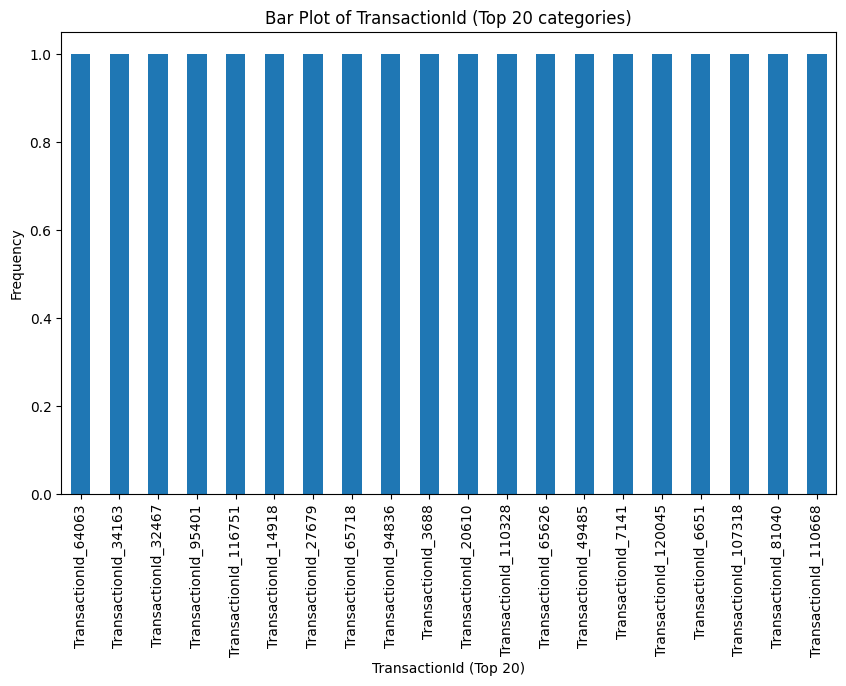




Analysis for column: BatchId


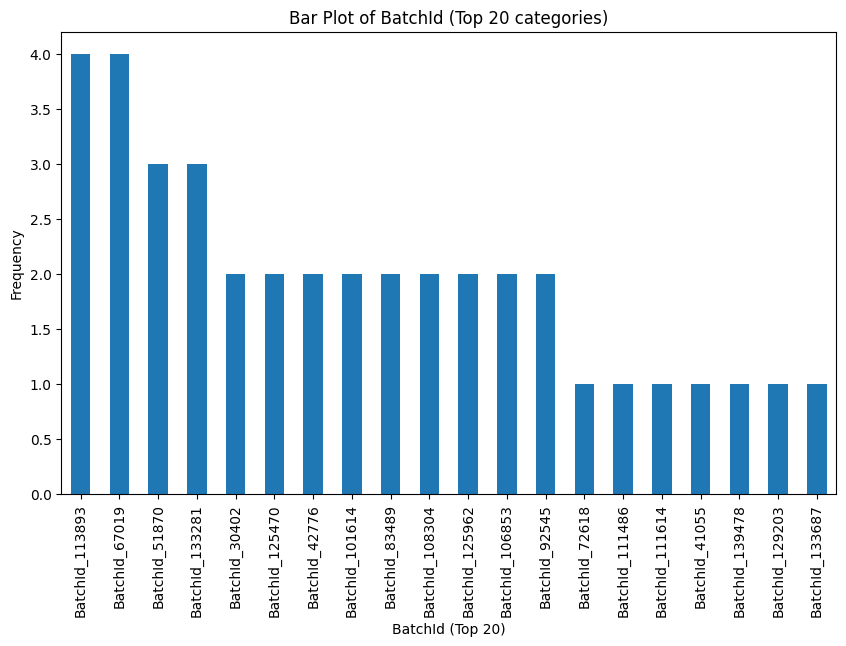




Analysis for column: AccountId


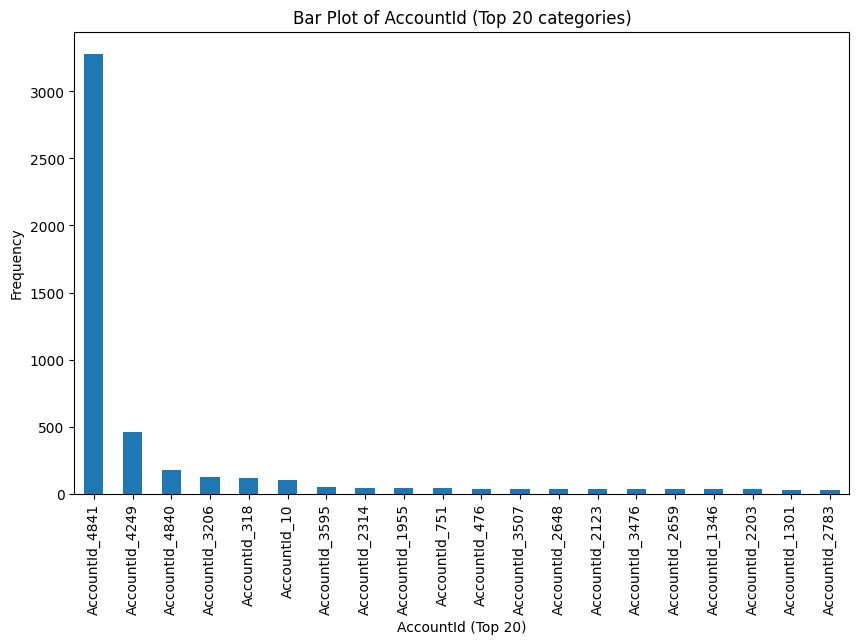




Analysis for column: SubscriptionId


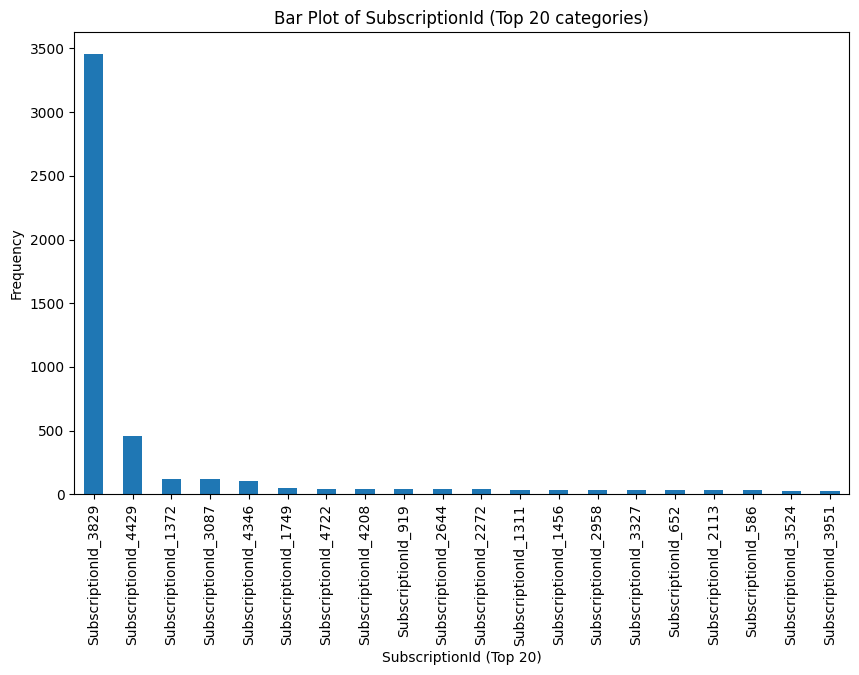




Analysis for column: CustomerId


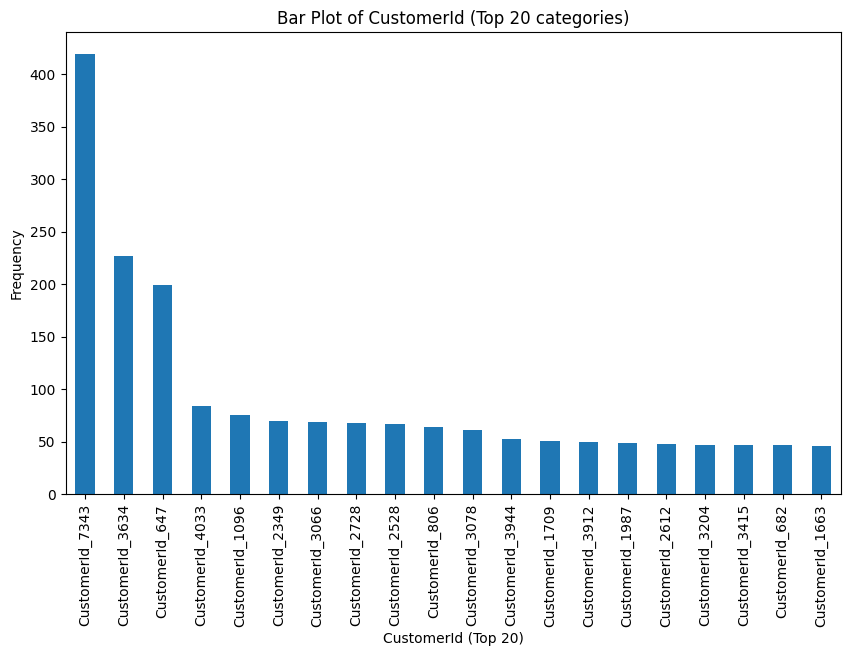




Analysis for column: CurrencyCode


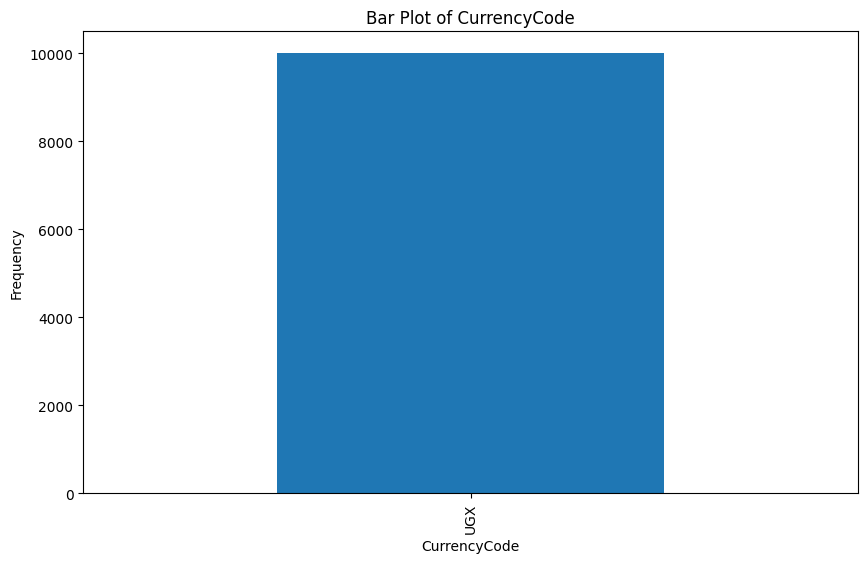




Analysis for column: CountryCode


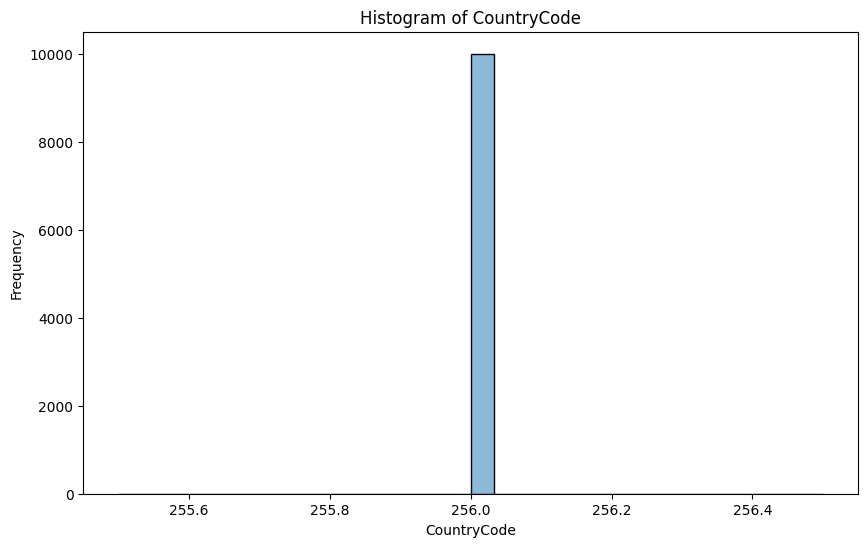




Analysis for column: ProviderId


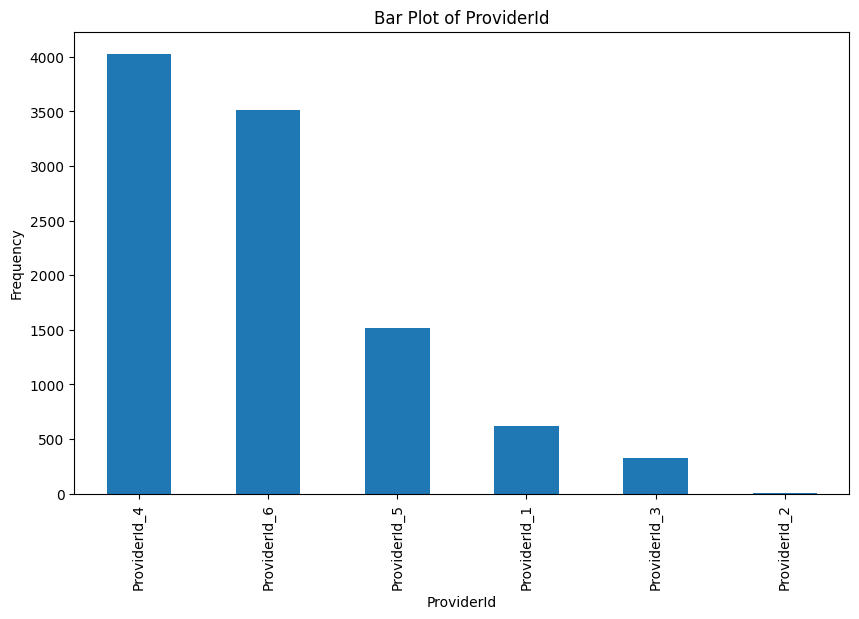




Analysis for column: ProductId


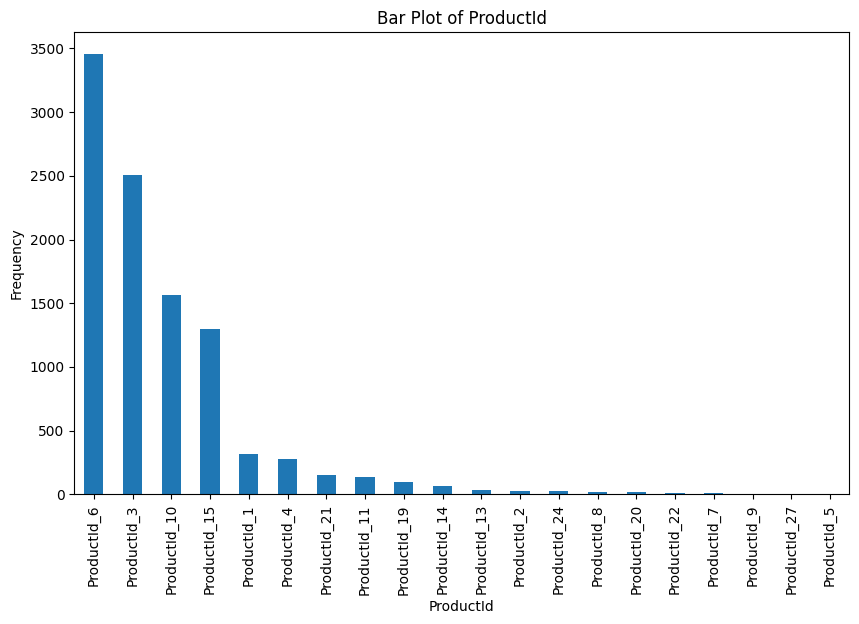




Analysis for column: ProductCategory


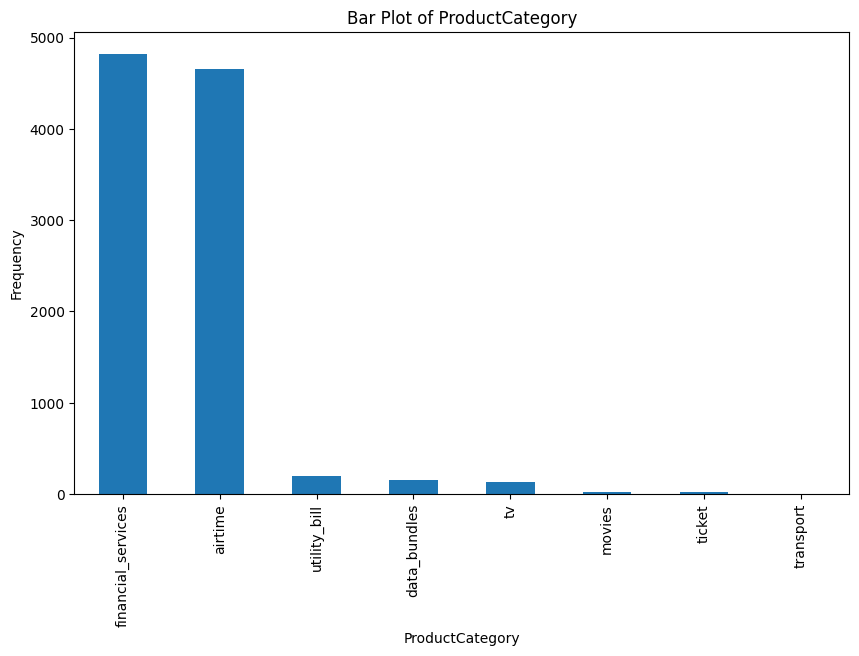




Analysis for column: ChannelId


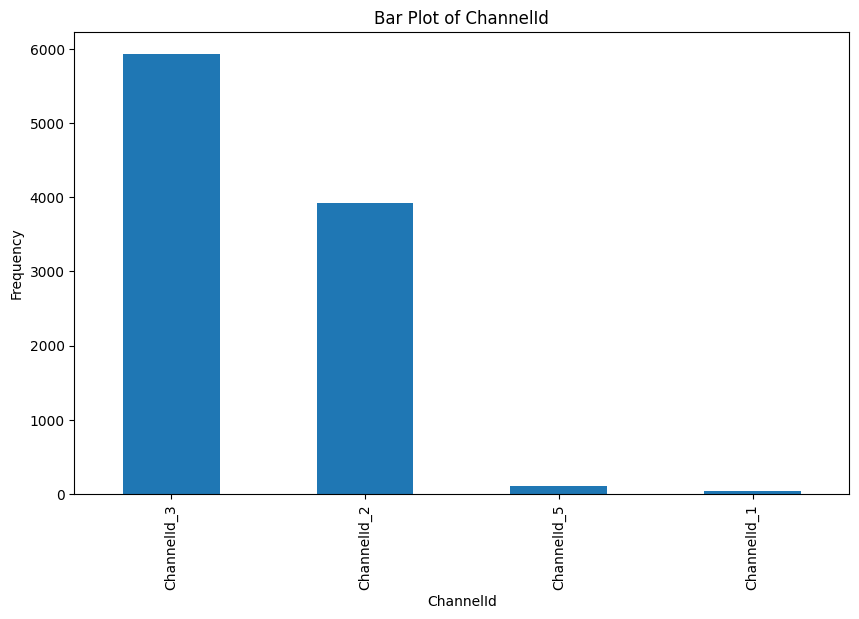




Analysis for column: Amount


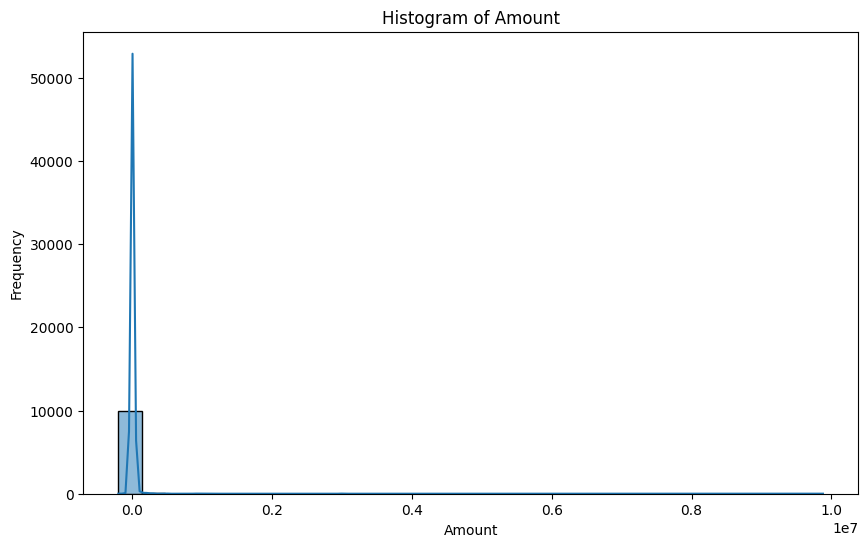




Analysis for column: Value


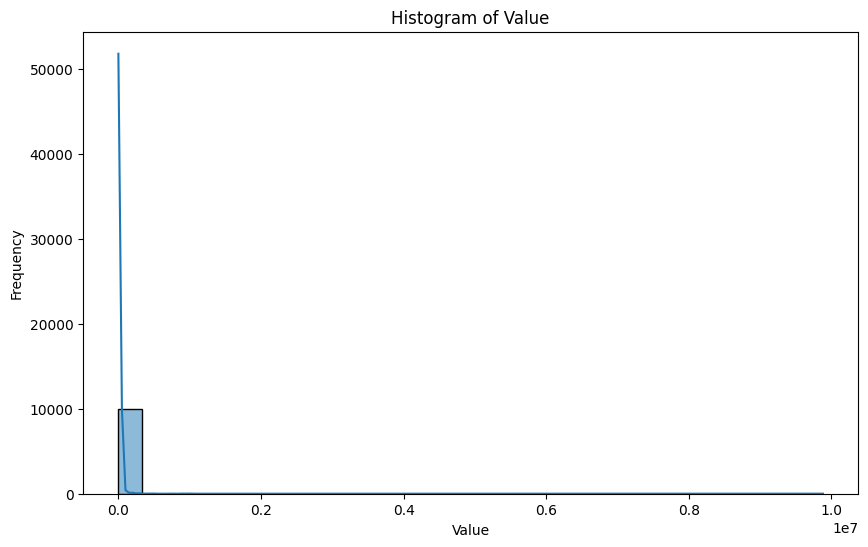




Analysis for column: TransactionStartTime


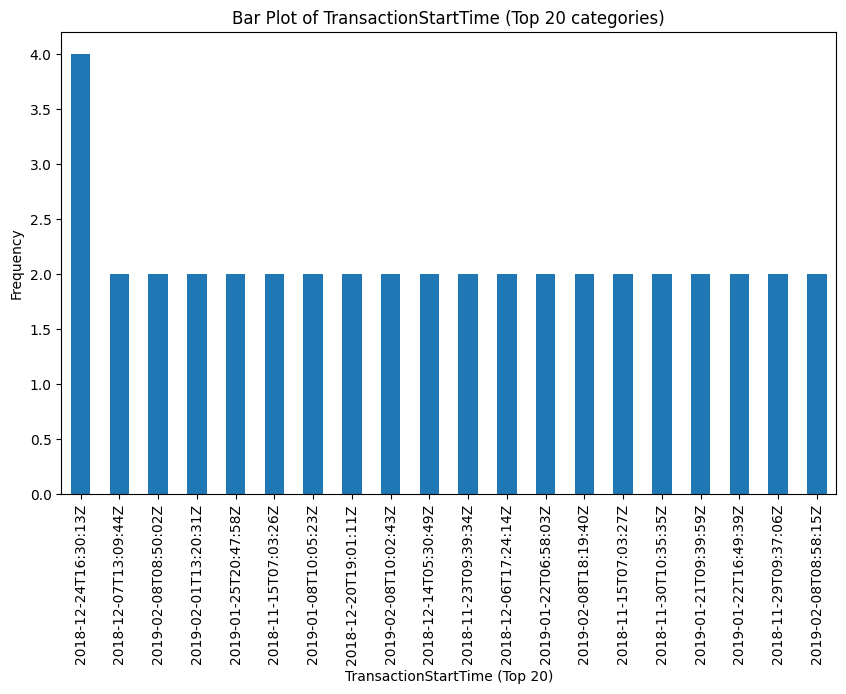




Analysis for column: PricingStrategy


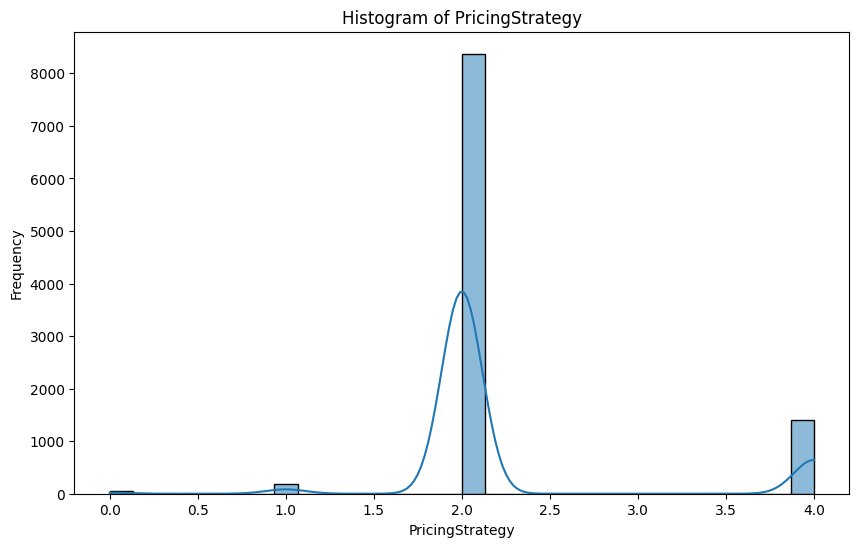




Analysis for column: FraudResult


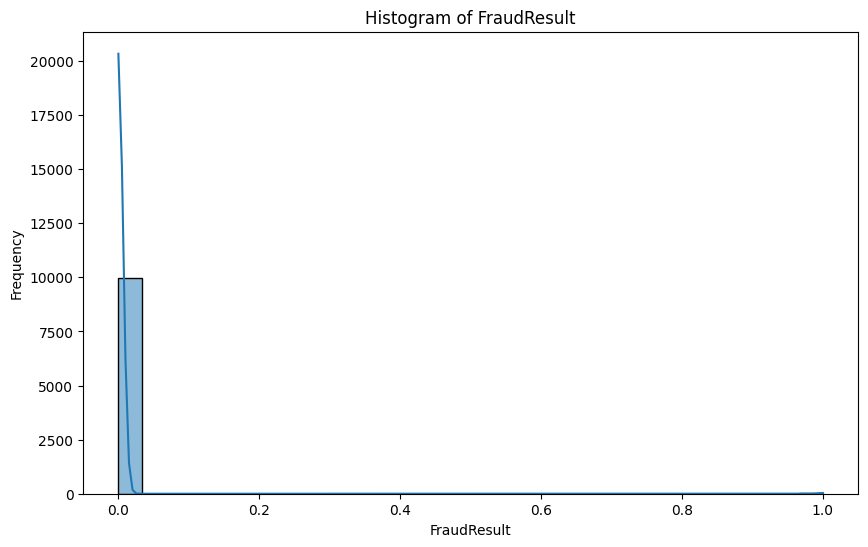

In [36]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")

        # Visualization
        plt.figure(figsize=(10, 6))

        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            # Limiting to top 20 categories to avoid clutter
            value_counts = column.value_counts()
            top_categories = value_counts[:20]
            top_categories.plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
            if len(value_counts) > 20:
                plt.title(f'Bar Plot of {column.name} (Top 20 categories)')
                plt.xlabel(f'{column.name} (Top 20)')
                plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    # Sampling the data if too large
    if len(df) > 10000:
        df_sample = df.sample(10000)
    else:
        df_sample = df

    for column in df_sample.columns:
        analyze_column(df_sample[column])

# Assuming df is your DataFrame
univariate_analysis(data)


# Correlation Analysis

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [97]:
# Convert the column to float
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [98]:
# Convert the column to float
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

In [99]:
# Convert the column to float
data['FraudResult'] = pd.to_numeric(data['FraudResult'], errors='coerce')

In [100]:
catagorical_columns = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy','FraudResult']
selected_columns = ['Amount', 'Value','FraudResult']
# Perform correlation analysis on selected columns
correlation_matrix = data[selected_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Amount,Value,FraudResult
Amount,1.000000,0.989692,0.557370
Value,0.989692,1.000000,0.566739
FraudResult,0.557370,0.566739,1.000000


In [101]:
# Function to infer and convert column data type after removing null values
def convert_column_dtype(df):
    for column in df.columns:
        non_null_data = df[column].dropna()

        if not non_null_data.empty:
            inferred_type = pd.api.types.infer_dtype(non_null_data)

            if inferred_type == 'string':
                df[column] = df[column].astype(str)
            elif inferred_type in ['integer', 'mixed-integer']:
                df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
            elif inferred_type in ['floating', 'mixed-integer-float']:
                df[column] = pd.to_numeric(df[column], errors='coerce')
            elif inferred_type == 'boolean':
                df[column] = df[column].astype(bool)
            elif inferred_type in ['datetime', 'date', 'timedelta']:
                df[column] = pd.to_datetime(df[column], errors='coerce')
            else:
                df[column] = df[column].astype('object')

    return df

# Convert data types of columns in the DataFrame
data = convert_column_dtype(data)

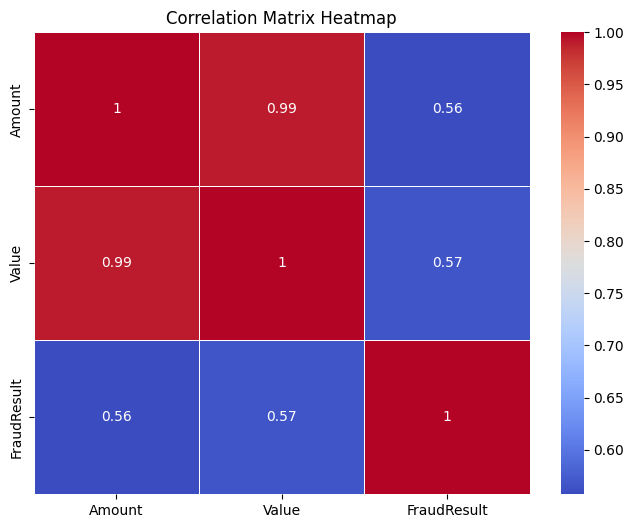

In [88]:
# Draw a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection

In [102]:
def detect_outliers(df):
    # Iterate over each numeric column
    for col in df.select_dtypes(include='number'):
        # Plotting boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[col], vert=False)
        plt.xlabel(col)
        plt.title(f'Boxplot for {col}')
        plt.show()

        # Detecting outliers using IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers detected in {col}:")
        print(outliers)
        print('\n')

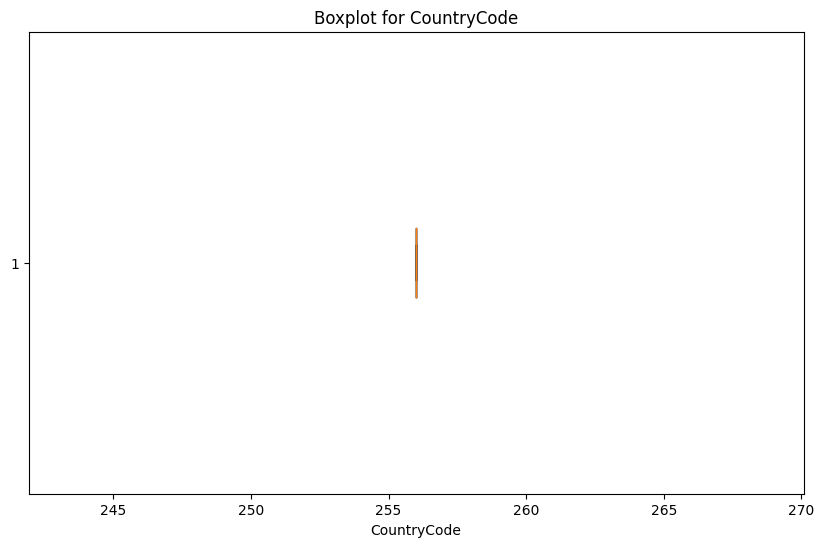

Outliers detected in CountryCode:
Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []




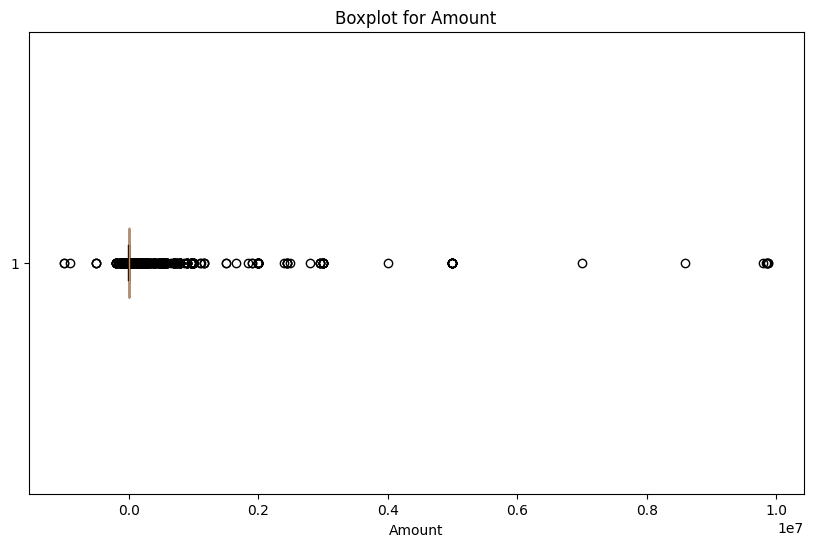

Outliers detected in Amount:
              TransactionId         BatchId       AccountId  \
3         TransactionId_380  BatchId_102363   AccountId_648   
6      TransactionId_118063  BatchId_118460  AccountId_2442   
32       TransactionId_5351  BatchId_110904  AccountId_2540   
39     TransactionId_104700   BatchId_55274  AccountId_2126   
40      TransactionId_13858   BatchId_86043  AccountId_2126   
...                     ...             ...             ...   
95633   TransactionId_66516   BatchId_98969  AccountId_3014   
95638   TransactionId_20690   BatchId_18591  AccountId_1232   
95640  TransactionId_131580   BatchId_16209  AccountId_1219   
95643  TransactionId_114220   BatchId_89378  AccountId_1318   
95656   TransactionId_68402   BatchId_17092  AccountId_2659   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
3      SubscriptionId_2185   CustomerId_988          UGX          256   
6      SubscriptionId_1980  CustomerId_2858          UGX          25

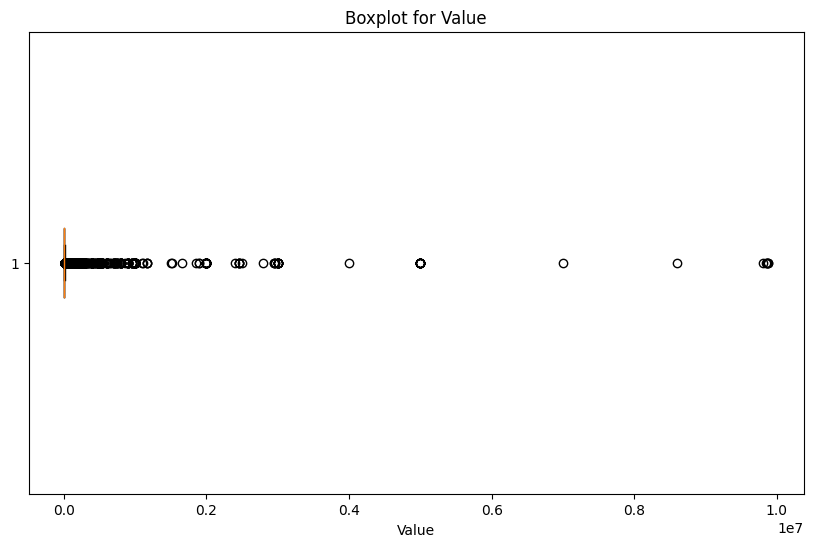

Outliers detected in Value:
              TransactionId         BatchId       AccountId  \
3         TransactionId_380  BatchId_102363   AccountId_648   
52      TransactionId_38396  BatchId_110362  AccountId_2744   
57      TransactionId_72438    BatchId_3221  AccountId_2744   
110     TransactionId_50492   BatchId_29008   AccountId_946   
114     TransactionId_74700   BatchId_72777   AccountId_946   
...                     ...             ...             ...   
95633   TransactionId_66516   BatchId_98969  AccountId_3014   
95638   TransactionId_20690   BatchId_18591  AccountId_1232   
95640  TransactionId_131580   BatchId_16209  AccountId_1219   
95643  TransactionId_114220   BatchId_89378  AccountId_1318   
95656   TransactionId_68402   BatchId_17092  AccountId_2659   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
3      SubscriptionId_2185   CustomerId_988          UGX          256   
52     SubscriptionId_1665  CustomerId_3165          UGX          256

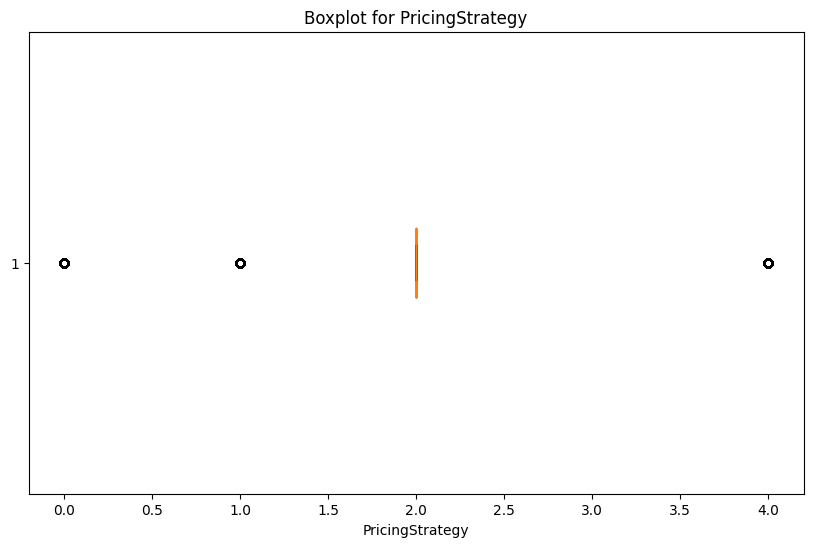

Outliers detected in PricingStrategy:
              TransactionId         BatchId       AccountId  \
6      TransactionId_118063  BatchId_118460  AccountId_2442   
19     TransactionId_119821   BatchId_89644  AccountId_3081   
21      TransactionId_93543  BatchId_103527  AccountId_3081   
46      TransactionId_16043   BatchId_22708  AccountId_1842   
58      TransactionId_92309   BatchId_91367  AccountId_1523   
...                     ...             ...             ...   
95605   TransactionId_89897   BatchId_81212   AccountId_769   
95610  TransactionId_121241    BatchId_1991  AccountId_3327   
95634    TransactionId_5394  BatchId_121783  AccountId_2965   
95635   TransactionId_11513   BatchId_25909  AccountId_2585   
95645  TransactionId_131922   BatchId_69178  AccountId_1726   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
6      SubscriptionId_1980  CustomerId_2858          UGX          256   
19     SubscriptionId_4312  CustomerId_3507          UGX   

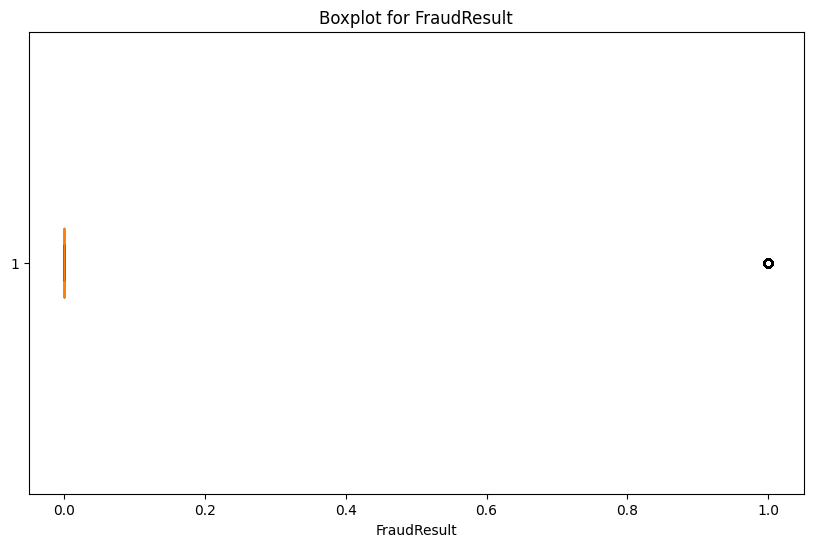

Outliers detected in FraudResult:
              TransactionId         BatchId       AccountId  \
131     TransactionId_60873   BatchId_93685  AccountId_3832   
146     TransactionId_28016  BatchId_125553  AccountId_2366   
155      TransactionId_1149   BatchId_10381  AccountId_3832   
2376   TransactionId_136904   BatchId_52644  AccountId_3692   
2452    TransactionId_88818   BatchId_54481  AccountId_3832   
...                     ...             ...             ...   
94805   TransactionId_69673  BatchId_111976  AccountId_4687   
95108  TransactionId_128664  BatchId_128748  AccountId_1909   
95262   TransactionId_33086   BatchId_40160  AccountId_1909   
95264  TransactionId_100613   BatchId_40160  AccountId_1909   
95268   TransactionId_44276   BatchId_19378  AccountId_1909   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
131    SubscriptionId_4161  CustomerId_4275          UGX          256   
146    SubscriptionId_4834  CustomerId_7414          UGX       

In [103]:
detect_outliers(data)

# Task 3
# Create Aggregate Features

In [104]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

In [105]:
# Group by CustomerId and calculate the aggregate features
aggregate_features  = data.groupby('CustomerId')['Amount'].agg(
    Total_Transaction_Amount='sum',
    Average_Transaction_Amount='mean',
    Transaction_Count='count',
    Std_Transaction_Amount='std',
).reset_index()

data = data.merge(aggregate_features, on='CustomerId', how='left')

data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610


# Extract Features

In [106]:
# Extract features from 'TransactionStartTime'
data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour
data['Transaction_Day'] = data['TransactionStartTime'].dt.day
data['Transaction_Month'] = data['TransactionStartTime'].dt.month
data['Transaction_Year'] = data['TransactionStartTime'].dt.year

# Encode Categorical Variables

In [107]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'PricingStrategy']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column inplace
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [108]:
data.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
24064,TransactionId_9180,BatchId_70011,AccountId_4421,SubscriptionId_4038,CustomerId_4878,0,0,ProviderId_5,ProductId_15,2,...,0,0,50804960.00,247829.073171,205,481438.102895,12,12,12,2018
22657,TransactionId_88852,BatchId_104877,AccountId_4841,SubscriptionId_3829,CustomerId_2871,0,0,ProviderId_4,ProductId_6,2,...,2,0,18370.00,1148.125000,16,1229.152655,19,10,12,2018
50612,TransactionId_11514,BatchId_120112,AccountId_3754,SubscriptionId_4216,CustomerId_4197,0,0,ProviderId_6,ProductId_3,0,...,2,0,39500.00,5642.857143,7,10110.696834,13,4,1,2019
71586,TransactionId_34026,BatchId_62049,AccountId_3476,SubscriptionId_2958,CustomerId_3912,0,0,ProviderId_6,ProductId_10,0,...,2,0,2578665.74,6067.448800,425,97013.231841,9,25,1,2019
95410,TransactionId_13686,BatchId_73032,AccountId_4841,SubscriptionId_3829,CustomerId_2441,0,0,ProviderId_4,ProductId_6,2,...,2,0,28735.00,926.935484,31,1964.300841,6,13,2,2019


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   TransactionId               95662 non-null  object             
 1   BatchId                     95662 non-null  object             
 2   AccountId                   95662 non-null  object             
 3   SubscriptionId              95662 non-null  object             
 4   CustomerId                  95662 non-null  object             
 5   CurrencyCode                95662 non-null  int64              
 6   CountryCode                 95662 non-null  int64              
 7   ProviderId                  95662 non-null  object             
 8   ProductId                   95662 non-null  object             
 9   ProductCategory             95662 non-null  int64              
 10  ChannelId                   95662 non-null  object        

# Normalize/Standardize Numerical Features

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columns to normalize or standardize
numerical_cols = ['Amount', 'Value', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount']

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Or, Standardize numerical features using Standard Scaling
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Default estimator and WoE binning

In [115]:
# Step 1: Calculate Recency, Frequency, Monetary, and Size metrics

# Assuming you have a dataset named df with the necessary columns
# Calculate Recency: difference between the latest transaction date and each transaction date for each customer
latest_transaction_date = data['TransactionStartTime'].max()
data['Recency'] = (latest_transaction_date - data['TransactionStartTime']).dt.days

# Calculate Frequency: count of transactions for each customer
frequency_df = data.groupby('CustomerId')['TransactionId'].count().reset_index()
frequency_df.rename(columns={'TransactionId': 'Frequency'}, inplace=True)

# Calculate Monetary: total transaction amount for each customer
monetary_df = data.groupby('CustomerId')['Amount'].sum().reset_index()
monetary_df.rename(columns={'Amount': 'Monetary'}, inplace=True)

# Calculate Size: average transaction amount for each customer
size_df = data.groupby('CustomerId')['Amount'].mean().reset_index()
size_df.rename(columns={'Amount': 'Size'}, inplace=True)

# Step 2: Normalize metrics if necessary (you can skip this step if the metrics are already on a similar scale)

# Step 3: Combine the metrics to calculate the RFMS score for each customer
rfms_df = frequency_df.merge(monetary_df, on='CustomerId').merge(size_df, on='CustomerId').merge(data.groupby('CustomerId')['Recency'].min().reset_index(), on='CustomerId')

# Assuming you want to calculate RFMS score using simple arithmetic
rfms_df['RFMS_score'] = (rfms_df['Recency'] * 100) + (rfms_df['Frequency'] * 10) + (rfms_df['Monetary'] * 1) + (rfms_df['Size'] * 0.1)

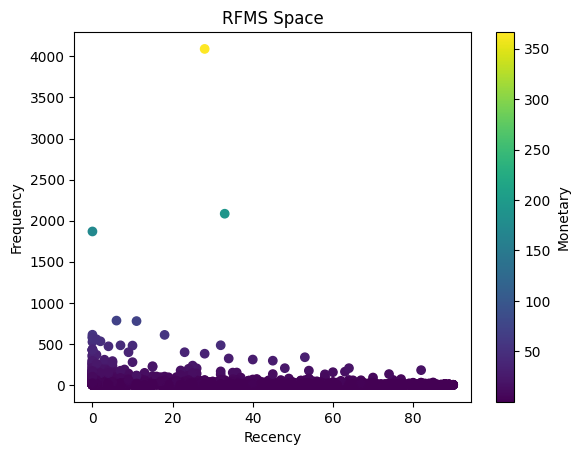

In [116]:
# Assuming you have a visualization library like matplotlib or seaborn installed
import matplotlib.pyplot as plt

# Scatter plot of RFMS scores
plt.scatter(rfms_df['Recency'], rfms_df['Frequency'], c=rfms_df['Monetary'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFMS Space')
plt.colorbar(label='Monetary')
plt.show()


In [117]:
# You can visually inspect the RFMS scatter plot to find a boundary, or use statistical methods like clustering
# For simplicity, let's assume you visually identified a boundary: Recency > 50, Frequency > 5, Monetary > 100, Size > 0.5

# Example code to establish boundary
rfms_df['label'] = 'good'  # Initialize all labels as 'good'
rfms_df.loc[(rfms_df['Recency'] > 50) | (rfms_df['Frequency'] > 5) | (rfms_df['Monetary'] > 100) | (rfms_df['Size'] > 0.5), 'label'] = 'bad'


In [119]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=50d040725db89804ee4485b944dce59f7e296b88b5323c6a45b9abdf1f940da2
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [122]:
# Example code for WoE binning
from scorecardpy import woebin

# WoE binning
bins = woebin(rfms_df, y="label")

# Print the bins
bins


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()


[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
CustomerId
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 3742 rows and 7 columns in 00:09:54


{'Monetary':    variable         bin  count  count_distr  good   bad   badprob       woe  \
 0  Monetary  [-inf,0.5)   1623     0.433725   962   661  0.407270 -1.430863   
 1  Monetary   [0.5,0.9)    578     0.154463     3   575  0.994810  4.200155   
 2  Monetary   [0.9,inf)   1541     0.411812     1  1540  0.999351  6.283935   
 
      bin_iv  total_iv breaks  is_special_values  
 0  1.084232  5.420717    0.5              False  
 1  0.856945  5.420717    0.9              False  
 2  3.479540  5.420717    inf              False  ,
 'Frequency':     variable         bin  count  count_distr  good   bad   badprob       woe  \
 0  Frequency  [-inf,3.0)    962     0.257082   524   438  0.455301 -1.234875   
 1  Frequency   [3.0,5.0)    397     0.106093   235   162  0.408060 -1.427592   
 2  Frequency   [5.0,inf)   2383     0.636825   207  2176  0.913135  1.296922   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.475010  1.477687    3.0              False  
 1  0.263982  1.4776

# Task 4 Modelling

In [136]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming you have features X and target variable y
# Drop the ID columns from the features before splitting the data
X = data.drop(columns=['Std_Transaction_Amount','TransactionStartTime','ProviderId', 'ProductId', 'ChannelId','TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'FraudResult'])

y = data['FraudResult']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CurrencyCode                95662 non-null  int64  
 1   CountryCode                 95662 non-null  int64  
 2   ProductCategory             95662 non-null  int64  
 3   Amount                      95662 non-null  float64
 4   Value                       95662 non-null  float64
 5   PricingStrategy             95662 non-null  int64  
 6   Total_Transaction_Amount    95662 non-null  float64
 7   Average_Transaction_Amount  95662 non-null  float64
 8   Transaction_Count           95662 non-null  float64
 9   Transaction_Hour            95662 non-null  int32  
 10  Transaction_Day             95662 non-null  int32  
 11  Transaction_Month           95662 non-null  int32  
 12  Transaction_Year            95662 non-null  int32  
 13  Recency                     956

In [141]:
# Choose models: Logistic Regression and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logistic_regression_model = LogisticRegression(solver='liblinear', max_iter=1000)
random_forest_model = RandomForestClassifier()

# Train the models on the training data
logistic_regression_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, solver='liblinear')

In [142]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.9983797627136362
Precision: 0.8571428571428571
Recall: 0.16666666666666666
F1 Score: 0.27906976744186046
ROC-AUC Score: 0.5833071512104868


In [146]:
# Make predictions
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
roc_auc_rf = roc_auc_score(y_test, y_pred_random_forest)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC Score:", roc_auc_rf)

Random Forest Model Evaluation:
Accuracy: 0.9997909371243402
Precision: 0.9210526315789473
Recall: 0.9722222222222222
F1 Score: 0.9459459459459458
ROC-AUC Score: 0.9860325647425717


In [150]:
# Hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
logistic_regression_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define hyperparameters for Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning using Grid Search for Logistic Regression
logistic_regression_grid_search = GridSearchCV(logistic_regression_model, logistic_regression_param_grid, cv=5)
logistic_regression_grid_search.fit(X_train, y_train)


# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", logistic_regression_grid_search.best_params_)

Best hyperparameters for Logistic Regression: {'C': 1}


In [153]:
# Make predictions
y_pred_logistic = logistic_regression_grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.9983797627136362
Precision: 0.8571428571428571
Recall: 0.16666666666666666
F1 Score: 0.27906976744186046
ROC-AUC Score: 0.5833071512104868
